In [133]:
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
plt.style.use('fivethirtyeight')
from fri import plot_dendrogram_and_intervals
from fri import plot

%matplotlib inline
from fri import genClassificationData
#X,y = genClassificationData(n_samples=200, n_features=20,n_strel=4, n_redundant=8,
#                    n_repeated=0, flip_y=0,random_state=2,partition=[4,4])

X,y =  genClassificationData(n_samples=200, n_features=50,n_strel=1, n_redundant=30,
                    n_repeated=0, flip_y=0,random_state=4,partition=[10,10,10])

Generating dataset with d=50,n=200,strongly=1,weakly=30, partition of weakly=[10, 10, 10]


In [134]:
from exp_tools import gen_split_feature

#X,y = gen_split_feature()
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

In [135]:
from fri import FRIClassification
fri = FRIClassification(optimum_deviation=0.01,parallel=True)

In [136]:
fri.fit(X_scaled,y)

In [137]:
from exp_tools import *

In [138]:
clust, link, feature_poins = fri.community_detection2(X_scaled,y)

In [114]:
print(feature_poins)

[[  0.00000000e+00   3.29209574e-02   3.29209574e-02 ...,   1.04144746e-02
    4.93765195e-02   1.32431238e-02]
 [  2.03624895e-11   0.00000000e+00   9.72533165e-12 ...,   1.04144746e-02
    4.93765219e-02   1.32431238e-02]
 [  2.03626005e-11   9.72544267e-12   0.00000000e+00 ...,   1.04144746e-02
    4.93765219e-02   1.32431238e-02]
 ..., 
 [  1.55471191e-11   4.37733183e-12   4.37733183e-12 ...,   0.00000000e+00
    4.93765150e-02   1.32431238e-02]
 [  1.47915945e-02   2.85327317e-12   2.85360624e-12 ...,   1.04144746e-02
    0.00000000e+00   1.32431238e-02]
 [  1.17044152e-11   6.51656507e-12   6.51706467e-12 ...,   1.04144746e-02
    4.93765046e-02   0.00000000e+00]]


In [115]:
import umap

In [130]:
um = umap.UMAP(n_neighbors=3,min_dist=0.01,n_components=2)
fp_umap = um.fit_transform(feature_poins)

In [131]:
fp_umap

array([[ 4.94589836,  2.93730058],
       [ 6.7466903 ,  5.6584909 ],
       [ 6.51514063,  5.61180229],
       [ 6.30975347,  5.30040826],
       [ 1.57597877,  2.46285002],
       [ 1.14028284,  2.59640836],
       [ 5.89316777,  5.26744055],
       [ 3.9947197 ,  3.56333756],
       [ 2.24158376,  2.40743803],
       [ 3.53592761,  3.27985285],
       [ 5.94614019,  4.60944606],
       [ 5.3410424 ,  4.83992713],
       [ 4.31021271,  3.11217045],
       [ 2.82541541,  2.50098904],
       [ 2.87274196,  3.51266231],
       [ 3.29459311,  3.69293621],
       [ 4.65374488,  2.64304523],
       [ 2.46097017,  3.14638881],
       [ 5.58910505,  4.268574  ],
       [ 4.37266294,  2.72996601],
       [ 0.53205708,  2.17489428],
       [ 3.11610534,  3.06187835],
       [ 6.38715109,  4.55644443],
       [ 4.76844696,  2.81196689],
       [ 0.69969751,  2.53164811],
       [ 0.82868393,  2.38243946],
       [ 6.18835051,  4.82433405],
       [ 2.41114784,  2.60703176],
       [ 6.64509341,

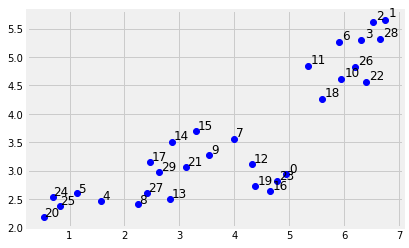

In [132]:
points = fp_umap
for i in range(len(points)):
    x = points[i][0]
    y = points[i][1]
    plt.plot(x, y, 'bo')
    plt.text(x * (1 + 0.01), y * (1 + 0.01) , i, fontsize=12)


In [70]:
clust

array([1, 3, 2, 1], dtype=int32)

In [13]:
print(fri.absolute_delta_bounds_summed_min)

[[  0.00000000e+00   2.62342877e-02   2.62342877e-02   4.21977667e-02]
 [  1.86642324e-09   0.00000000e+00   4.52302228e-01   4.04790722e-10]
 [  1.86642313e-09   4.52302228e-01   0.00000000e+00   4.04790916e-10]
 [  8.25526811e-04   9.50056700e-11   9.50058920e-11   0.00000000e+00]]


# Difference of constrained problems

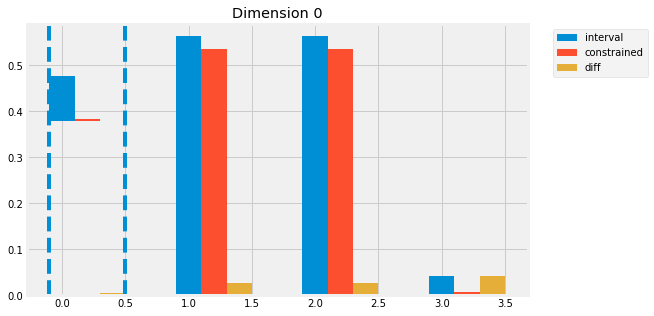

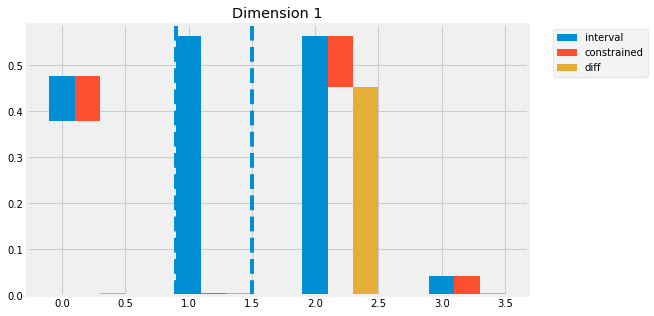

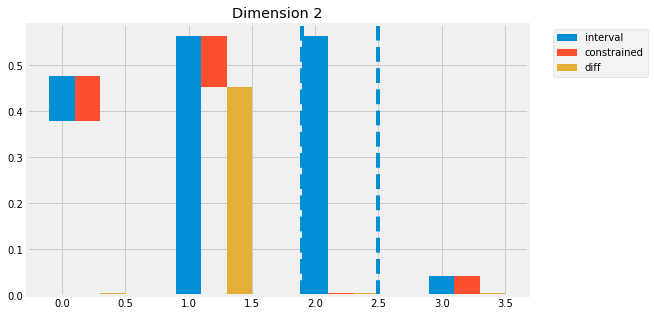

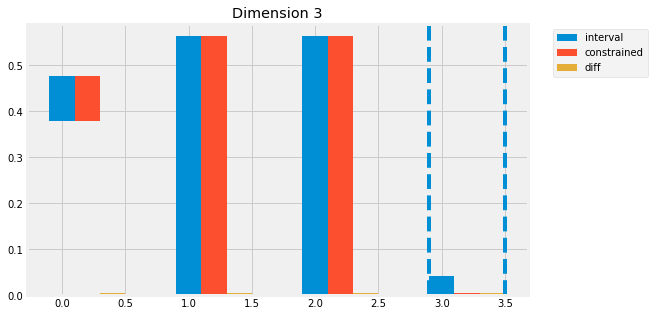

In [15]:
for d in range(X.shape[1]):
    ints = fri.interval_
    conr = fri.interval_constrained_to_min
    condiff = fri.absolute_delta_bounds_summed_min[d]
    plotbars([ints,conr[d],condiff],["interval","constrained","diff"],X,d)

# New community detection using  constrained problems

In [16]:
sns.heatmap(dist_mat)

NameError: name 'dist_mat' is not defined

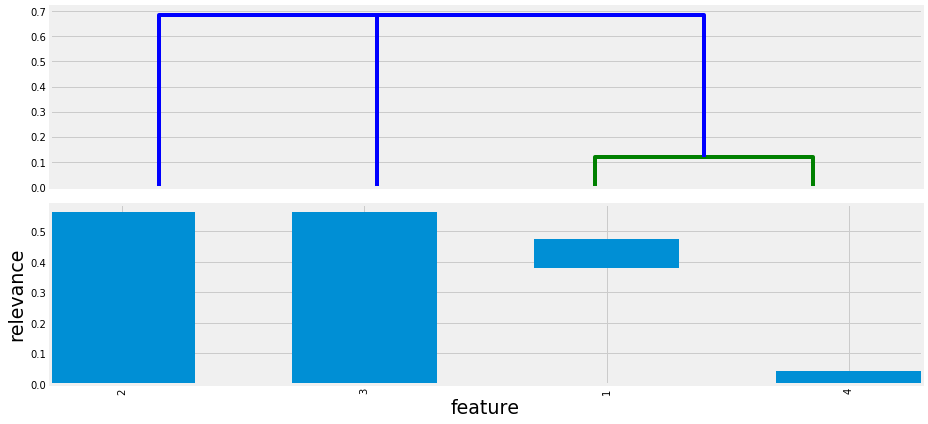

In [17]:
p = plot_dendrogram_and_intervals(fri.interval_,link)

# Old community detection using differnce between optimal solution and unconstrained problem

In [23]:
clust, link, dist_mat = fri.community_detection()

In [24]:
clust

array([1, 2, 1, 1, 3], dtype=int32)

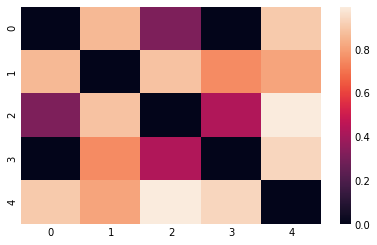

In [25]:
sns.heatmap(dist_mat)

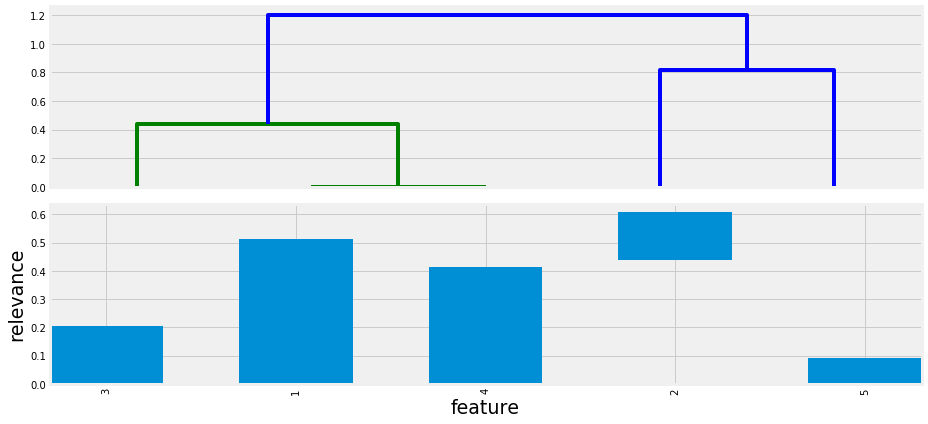

In [26]:
p = plot_dendrogram_and_intervals(fri.interval_,link)

# Simple Correlation 

/home/lpfannschmidt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  # This is added back by InteractiveShellApp.init_path()


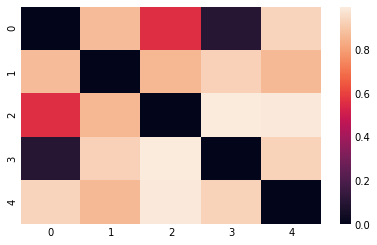

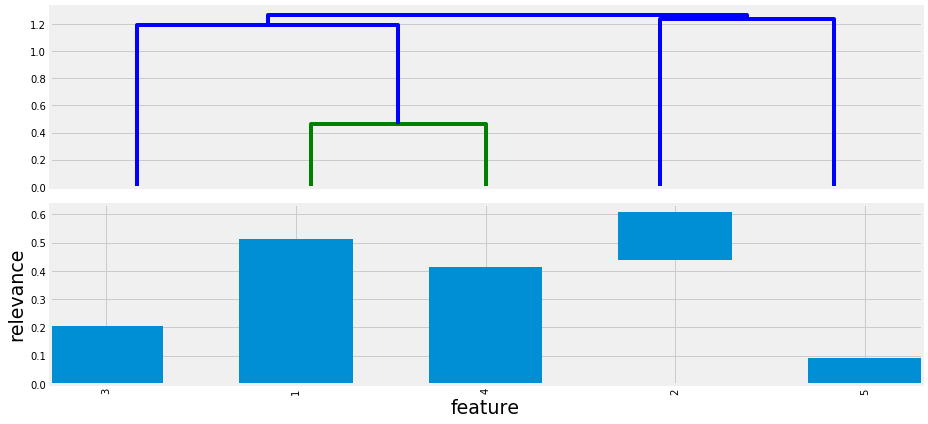

In [27]:
import pandas as pd
corr_pd = pd.DataFrame(X_scaled).corr()

corr_pd = 1-corr_pd.abs()
corr_pd = corr_pd.values

sns.heatmap(corr_pd)

from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage
z = linkage(corr_pd,method="single")
threshold = 0.55*np.max(z[:, 2])
p = plot.plot_dendrogram_and_intervals(fri.interval_,z)

In [28]:
 pd.DataFrame(X_scaled).corr()

,0,1,2,3,4
0,1.000000,0.125008,0.442438,0.898347,-0.064520
1,0.125008,1.000000,0.137805,0.071891,-0.132137
2,0.442438,0.137805,1.000000,0.003513,-0.010188
3,0.898347,0.071891,0.003513,1.000000,-0.066954
4,-0.064520,-0.132137,-0.010188,-0.066954,1.000000
